<a href="https://colab.research.google.com/github/LaurindoJr/Machine-Learning/blob/main/Q1Q2_nice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

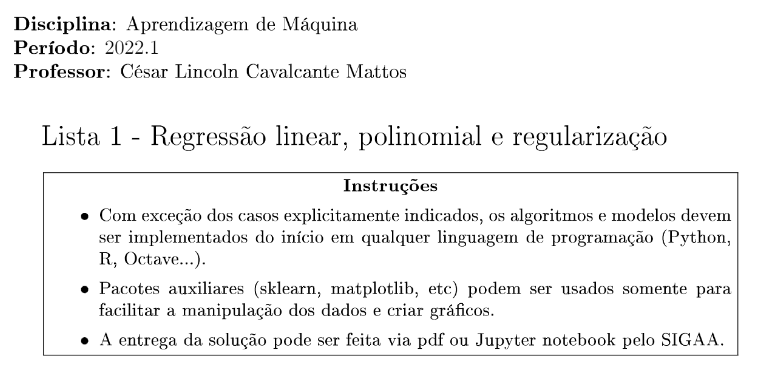

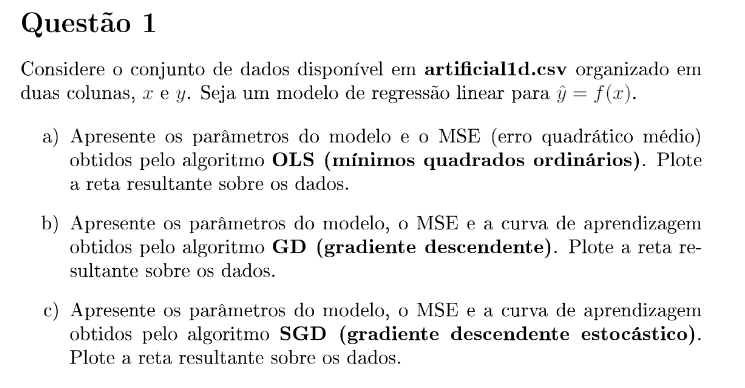

In [2]:
import pandas as pd
import numpy as np
#from abc import ABC, abstractmethod
from typing import Any
from sklearn.model_selection import train_test_split
from tqdm.notebook import trange
import plotly.express as px
import plotly.graph_objs as go

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/artificial1d.csv', header=None, names=['x', 'y'])

In [4]:
df.dtypes #This return a series with the data type of each column

x    float64
y    float64
dtype: object

## **ZSCORE NORMALIZE E DENORMALIZE**

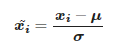

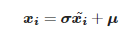

In [5]:
def z_score(df: np.ndarray): #return zscore_normalize
        mean = df.mean()
        sd = df.std()
        z = (df-mean)/sd 
        return z, lambda x: (sd*x) + mean #denormalize

## **ROOT MEAN SQUARED ERROR**

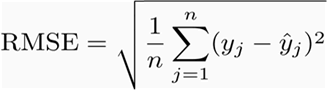

In [6]:
def rmse(df_initial: np.ndarray, df_predicted: np.ndarray):
        diff = (df_initial - df_predicted) ** 2
        return np.sqrt(diff.mean())

In [7]:
z_score(df)

(           x         y
 0  -1.647089 -2.017762
 1  -1.533497 -1.309044
 2  -1.419905 -1.101243
 3  -1.306312 -0.883802
 4  -1.192720 -0.331011
 5  -1.079127 -0.468173
 6  -0.965535 -0.809468
 7  -0.851943 -0.895181
 8  -0.738350 -0.908164
 9  -0.624758 -0.872442
 10 -0.511166 -0.897043
 11 -0.397573 -1.223600
 12 -0.283981 -0.738895
 13 -0.170389 -0.487763
 14 -0.056796  0.029363
 15  0.056796  0.264092
 16  0.170389  0.028028
 17  0.283981  0.593774
 18  0.397573  1.166647
 19  0.511166  0.876850
 20  0.624758  0.878171
 21  0.738350  1.015138
 22  0.851943  1.431060
 23  0.965535  0.508255
 24  1.079127  0.494481
 25  1.192720  0.596410
 26  1.306312  0.709345
 27  1.419905  0.975117
 28  1.533497  1.272194
 29  1.647089  2.104667, <function __main__.z_score.<locals>.<lambda>>)

## **Separando os dados**

In [8]:
normalized_x, denormalized_x = z_score(df['x'].to_numpy()) # Storing Data

In [9]:
normalized_y, denormalized_y = z_score(df['y'].to_numpy())# Storing Data

In [10]:
def add_onescolumn(df: np.ndarray): # np.column_stack - used to stack 1-D arrays as columns into a 2-D array
         return np.column_stack([np.ones(df.shape[0]), df ]) # np.ones -returns a new array of given shape and data type, where the element's value is set to 1
                                                            # shape - a tuple that always gives dimensions of the array

In [11]:
X_ones = add_onescolumn(normalized_x)
X_ones

array([[ 1.        , -1.67524673],
       [ 1.        , -1.55971247],
       [ 1.        , -1.44417822],
       [ 1.        , -1.32864396],
       [ 1.        , -1.2131097 ],
       [ 1.        , -1.09757545],
       [ 1.        , -0.98204119],
       [ 1.        , -0.86650693],
       [ 1.        , -0.75097267],
       [ 1.        , -0.63543842],
       [ 1.        , -0.51990416],
       [ 1.        , -0.4043699 ],
       [ 1.        , -0.28883564],
       [ 1.        , -0.17330139],
       [ 1.        , -0.05776713],
       [ 1.        ,  0.05776713],
       [ 1.        ,  0.17330139],
       [ 1.        ,  0.28883564],
       [ 1.        ,  0.4043699 ],
       [ 1.        ,  0.51990416],
       [ 1.        ,  0.63543842],
       [ 1.        ,  0.75097267],
       [ 1.        ,  0.86650693],
       [ 1.        ,  0.98204119],
       [ 1.        ,  1.09757545],
       [ 1.        ,  1.2131097 ],
       [ 1.        ,  1.32864396],
       [ 1.        ,  1.44417822],
       [ 1.        ,

In [12]:
def reshape_vector(x: np.ndarray): 
        return x.reshape([-1, 1]) # specifies the new shape of the array.

In [13]:
y = reshape_vector(normalized_y)
y

array([[-2.05225665],
       [-1.33142282],
       [-1.12006895],
       [-0.89891082],
       [-0.33667005],
       [-0.47617613],
       [-0.82330647],
       [-0.91048398],
       [-0.92368912],
       [-0.88735694],
       [-0.91237789],
       [-1.2445175 ],
       [-0.75152664],
       [-0.49610104],
       [ 0.02986453],
       [ 0.26860656],
       [ 0.02850739],
       [ 0.60392426],
       [ 1.18659107],
       [ 0.89184046],
       [ 0.8931833 ],
       [ 1.03249214],
       [ 1.45552426],
       [ 0.51694346],
       [ 0.50293433],
       [ 0.60660624],
       [ 0.72147105],
       [ 0.9917867 ],
       [ 1.29394214],
       [ 2.14064714]])

## **Visualização**

In [14]:
def show_rmse_curve(history, title='ROOT MEAN SQUARED ERROR'):
    rmse_values = [step['rmse_error'] for step in history]
    steps = [i for i, _ in enumerate(history)] # enumerate - allows us to iterate through a sequence but it keeps track of both the index and the element
    fig = px.line(x=steps, y=rmse_values, labels={'x':'steps', 'y':'RMSE'}, title=title)
    return fig

def show_final_result(history, 
                      denormalized_function=denormalized_y,
                      title='Model Result', 
                      x=df['x'],
                      y=df['y'],
                      test_matrix=X_ones):
    
    if isinstance(history, list):
        final_model = history[-1]['model']
    else:
        final_model = history
    
    preds = denormalized_y(final_model.predict(test_matrix))
    fig = px.scatter(x=x, y=y, title=title)
    fig.add_trace(
        go.Scatter(x=x, y=preds[:, 0])
    )
    
    return fig

## **Preparando Modelo de Regressao**

In [15]:
class LinearModel:

    w: np.ndarray 

    def __init__(self, w: np.ndarray):
        self.w = w.reshape([-1, 1])

    def predict(self, x: np.ndarray):
        return x @ self.w

    def first_model(lenght: int, fill_value: float):
        w = np.full(shape=lenght,fill_value=fill_value).reshape([-1, 1])
        return LinearModel(w)

    def update(self, w: np.ndarray):
        self.w = w.reshape([-1, 1])

    def __copy__(self):
        return LinearModel(self.w.reshape([-1, 1]))
  

In [16]:
class LinearAlgoritm():

    initial_w_values: float
    ephocs: int
    alpha: float
    with_history_predictions: bool
    seed: int
    l2_regulazation: float

    def __init__(self, alpha=0.01, ephocs=100, initial_w_values=1, l2_regulazation=0, with_history_predictions=False, seed=1234):

        self.l2_regulazation = l2_regulazation
        self.seed = seed
        self.with_history_predictions = with_history_predictions
        self.initial_w_values = initial_w_values
        self.ephocs = ephocs
        self.alpha = alpha
    

## **ORDINARY LEAST SQUARES**

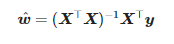

In [17]:
class OrdinaryLeastSquares(LinearAlgoritm):

	def fit(self, dfx: np.ndarray, dfy: np.ndarray, **kwargs):
		l2_reg_matrix = np.eye(dfx.shape[1]) * self.l2_regulazation
		w = np.linalg.inv( (dfx.T @ dfx) + l2_reg_matrix ) @ dfx.T @ dfy
		return LinearModel(w)

In [18]:
ols = OrdinaryLeastSquares(ephocs=10000, with_history_predictions=True)

In [19]:
model_ols = ols.fit(X_ones, y)

In [20]:
show_final_result(model_ols)

## **DESCENT GRADIENT**

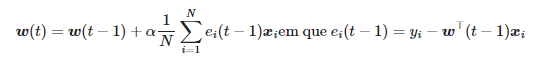

In [21]:
class GradientDescent(LinearAlgoritm):

    def __step_training(self, dfx: np.ndarray, dfy: np.ndarray, model: LinearModel):
        predicted = model.predict(dfx)
        error = y - predicted
        w = model.w + self.alpha * ( (1 / dfx.shape[0]) * (dfx.T @ error) - self.l2_regulazation*model.w)
        model.update(w)
        return model

    def __training_loop(self, dfx: np.ndarray, dfy: np.ndarray, model: LinearModel):
        pbar = trange(self.ephocs)
        for ephoc in pbar:
            model = self.__step_training(dfx, dfy, model)
            predicted = model.predict(dfx)
            error = rmse(dfy, predicted)
            pbar.set_description(f"RMSE: {error} \n")

            yield {
                    'ephoc': ephoc,
                    'model': model.__copy__(),
                    'rmse_error': error
                   }

    def fit(self, dfx: np.ndarray, dfy: np.ndarray, **kwargs):

        first_model = LinearModel.first_model(
            lenght=dfx.shape[1],
            fill_value=self.initial_w_values
        )

        history = list(self.__training_loop(dfx, dfy, first_model))

        if self.with_history_predictions:
            return history

        final_model = history[-1]['model']

        return final_model

In [22]:
gd = GradientDescent(ephocs=1000, with_history_predictions=True, l2_regulazation=0.001)

In [23]:
history_gd = gd.fit(X_ones, y)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [24]:
show_rmse_curve(history_gd)

In [25]:
show_final_result(history_gd)


## **STOCHASTIC GRADIENT DESCENT**

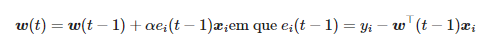

In [26]:
class StochasticGradientDescent(LinearAlgoritm):

	def __step_training(self, x: np.ndarray, y: np.ndarray, model: LinearModel):
		predicted = model.predict(x)
		error = (y - predicted)
		w = model.w + (self.alpha * (error * x.T - (self.l2_regulazation * model.w) ))
		model.update(w)
		return model

	def __training_loop(self, x: np.ndarray, y: np.ndarray, model: LinearModel):
		pbar = trange(self.ephocs)
		for ephoc in pbar:
			for observation, correct_value in zip(x, y):
				observation, correct_value = observation.reshape([1, -1]), correct_value[0]
				model = self.__step_training(observation, correct_value, model)
				predicted = model.predict(x)
				error = rmse(y, predicted)

				yield {
					'ephoc': ephoc,
					'model': model.__copy__(),
					'rmse_error': error
				}

			pbar.set_description(f"RMSE: {error} \n")

	def fit(self, x: np.ndarray, y: np.ndarray, **kwargs):
		first_model = LinearModel.first_model(
			lenght=x.shape[1],
			fill_value=self.initial_w_values
		)

		idx = np.arange(x.shape[0])
		np.random.shuffle(idx)

		x_shuffle = x[idx]
		y_shuffle = y[idx]

		history = list(self.__training_loop(x_shuffle, y_shuffle, first_model))

		if self.with_history_predictions:
			return history

		final_model = history[-1]['model']

		return final_model

In [27]:
gde = StochasticGradientDescent(ephocs=100, with_history_predictions=True, l2_regulazation=0.001)

In [28]:
history_gde = gde.fit(X_ones, y)


  0%|          | 0/100 [00:00<?, ?it/s]

In [29]:
show_rmse_curve(history_gde)


In [30]:
show_final_result(history_gde)


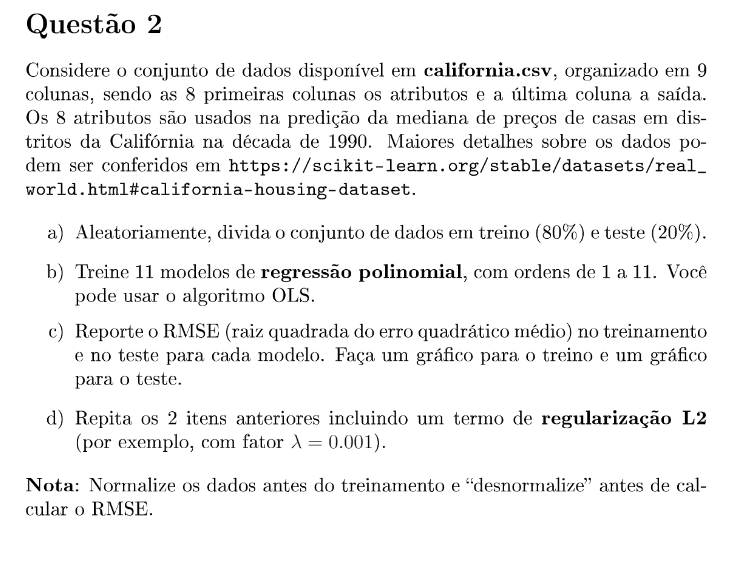

## **POLYNOMIAL TRANSFORMATION**

In [31]:
def polynomial_create(x: np.ndarray, order: int, with_bias=False):

        if with_bias: x = add_onescolumn(x)
        po_arrays = [x[:, c] ** i for c in range(1, x.shape[1]) for i in range(2, order)]
        return np.column_stack([x, *po_arrays])

In [32]:
X_poly = polynomial_create(X_ones, 11)

In [33]:
model_ols_poly = ols.fit(X_poly, y)

In [34]:
show_final_result(model_ols_poly, test_matrix=X_poly)


In [35]:
df_poly = pd.read_csv('/content/drive/MyDrive/Data/california.csv', header=None)

## **PREPARING DATA**

In [36]:
arrpoly = df_poly.to_numpy()

In [37]:
X_poly = arrpoly[:, :8]

In [38]:
y_poly = reshape_vector(arrpoly[:, 8])

## **NORMALIZE**

In [39]:
X_norm = np.empty_like(X_poly) # np.empty_like - Return a new array with the same shape and type as a given array.

for idx, col in enumerate(X_poly.T): 
    normp, denormp= z_score(col)
    X_norm[:, idx] = normp

In [40]:
y_norm, denormalized_y_p = z_score(y_poly)

## **SEPARATING DATA AND STORING**

In [41]:
def gtest(max_order, l2_reg=0):
    
    orders = [i for i in range(1, max_order)]
    ols = OrdinaryLeastSquares(l2_regulazation=l2_reg)
    rmse_erros_train = []
    rmse_erros_test = []
    
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)
    
    for order in orders:
        
        X_train_po = polynomial_create(X_train, order, with_bias=True)
        X_test_po = polynomial_create(X_test, order, with_bias=True)
        
        model = ols.fit(X_train_po, y_train)
        
        preds_train = model.predict(X_train_po)
        preds_test = model.predict(X_test_po)
        
        rmse_erros_train.append(rmse(
        denormalized_y_p(y_train),
        denormalized_y_p(preds_train)
        ))
        
        rmse_erros_test.append(rmse(
        denormalized_y_p(y_test),
        denormalized_y_p(preds_test)
        ))
    
    
    plots = [
        go.Scatter(x=orders, y=rmse_erros_train, name='Train RMSE'),
        go.Scatter(x=orders, y=rmse_erros_test, name='Test RMSE')
    ]
        
    fig = go.Figure(data=plots)

    return fig
        

## **TESTING**

In [42]:
fig = gtest(11)

In [43]:
fig

In [44]:
fig = gtest(11, l2_reg=0.001)

In [45]:
fig